In [1]:
#libraries needed

import numpy as np
import matplotlib.pyplot as plt

In [77]:
#input parameters

nopoints=100000      #number of total points to start with
boxsize=1000       #lenght of the 2d box
nocircles=20        #number of circles
radius=50            #fixed radius for the circles
densityratio=0.01     #density ratio between outside and inside of circles

print ('Box size =',boxsize/1000,'Gpc') 
print ('density =',nopoints/boxsize**2,'galaxies/Mpc^2') 
print ('density ratio between inside to outside =',densityratio) 

Box size = 1.0 Gpc
density = 0.1 galaxies/Mpc^2
density ratio between inside to outside = 0.01


In [78]:
#array definitions

x=np.zeros(nopoints)
y=np.zeros(nopoints)
x1=np.copy(x)
y1=np.copy(y)
x2=np.copy(x)
y2=np.copy(y)
xcircle=np.zeros(nocircles)
ycircle=np.zeros(nocircles)

In [79]:
#create box with random points - catalogue

for i in range(nopoints):
    x[i]=boxsize*np.random.random_sample()
    y[i]=boxsize*np.random.random_sample()

In [80]:
#create circle center

for i in range(nocircles):
    if i==0 :
        xcircle[i]=boxsize*np.random.random_sample()
        ycircle[i]=boxsize*np.random.random_sample()
    else :
        xcircle[i]=boxsize*np.random.random_sample()
        ycircle[i]=boxsize*np.random.random_sample()
        
        #next condition ensures the center are never less than 2 radii apart
        
        while len([True for k in range(i) if ((xcircle[i]-xcircle[k])**2 + (ycircle[i]-ycircle[k])**2  > 4*radius**2)]) < i :
            xcircle[i]=boxsize*np.random.random_sample()
            ycircle[i]=boxsize*np.random.random_sample()    

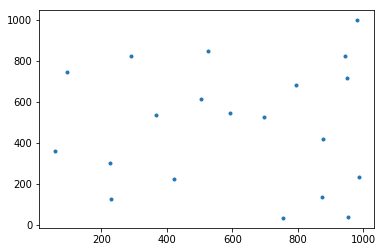

In [81]:
#plot circle centers

plt.plot(xcircle,ycircle,'.')
plt.show()

In [82]:
#cut circles of radius=radius from the catalogue

count = 0

for j in range(nopoints):
    #if point is outside all circles send them to catalogue 2
    if len([True for k in range(nocircles) if ((x[j]-xcircle[k])**2 + (y[j]-ycircle[k])**2  > radius**2)])==nocircles :
        count+=1
        x2[j]=x[j]
        y2[j]=y[j]        
    #if point is inside one circle send them to catalogue 1
    elif np.random.random_sample()<densityratios :            #this condition takes the density fraction of points inside circles
        x1[j]=x[j]
        y1[j]=y[j]
print ('fraction of kept points outside circles:',count/nopoints)

fraction of kept points outside circles: 0.85255


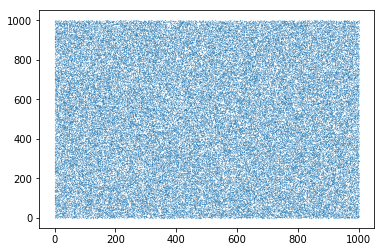

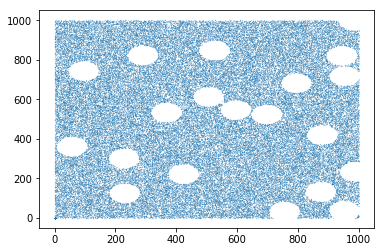

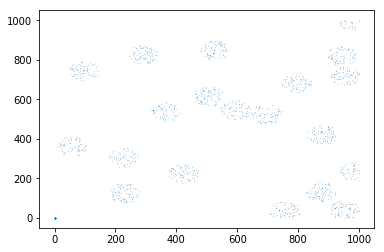

In [83]:
#plot the 3 catalogues: full, full with circles cut, only circles

plt.plot(x,y, linestyle='', marker='o', markersize=0.1)
plt.show()
plt.plot(x2,y2, linestyle='', marker='o', markersize=0.1)
plt.show()
plt.plot(x1,y1, linestyle='', marker='o', markersize=0.1)
plt.show()

In [85]:
#construct a full catalogue with 1 and 2
x3=np.trim_zeros(np.concatenate((x1,x2)))
y3=np.trim_zeros(np.concatenate((y1,y2)))

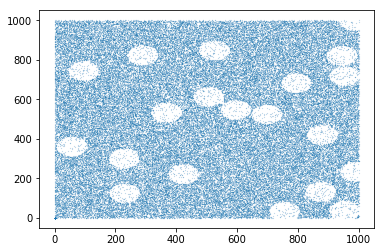

In [86]:
#plot full catalogue

plt.plot(x3,y3, linestyle='', marker='o', markersize=0.1)
plt.show()